In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [71]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/TravelInsurancePrediction.csv",index_col=0)
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [72]:
data.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [73]:
data.shape

(1987, 9)

In [74]:
data.describe(include='all')

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000
unique,NaN,2,2,NaN,NaN,NaN,2,2,NaN
top,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN
freq,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN
mean,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323
std,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332
min,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000
25%,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000
50%,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000
75%,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000


In [75]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [76]:
data.dropna(inplace=True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


In [78]:
# Encoding Using MAP Function
data["Employment Type"] = data["Employment Type"].map({"Government Sector": 0, "Private Sector/Self Employed": 1})
data["GraduateOrNot"] = data["GraduateOrNot"].map({"No": 0, "Yes": 1})
data["FrequentFlyer"] = data["FrequentFlyer"].map({"No": 0, "Yes": 1})
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
data["TravelInsurance"] = data["TravelInsurance"].map({0: "Not Purchased", 1: "Purchased"})

In [79]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "Age",
                      color = "TravelInsurance",
                      title= "Factors Affecting Purchase of Travel Insurance: Age")
figure.show()

In [80]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "Employment Type",
                      color = "TravelInsurance",
                      title= "Factors Affecting Purchase of Travel Insurance: Employment Type")
figure.show()

In [81]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "AnnualIncome",
                      color = "TravelInsurance",
                      title= "Factors Affecting Purchase of Travel Insurance: Income")
figure.show()

**Detect outlier**

In [82]:
data.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

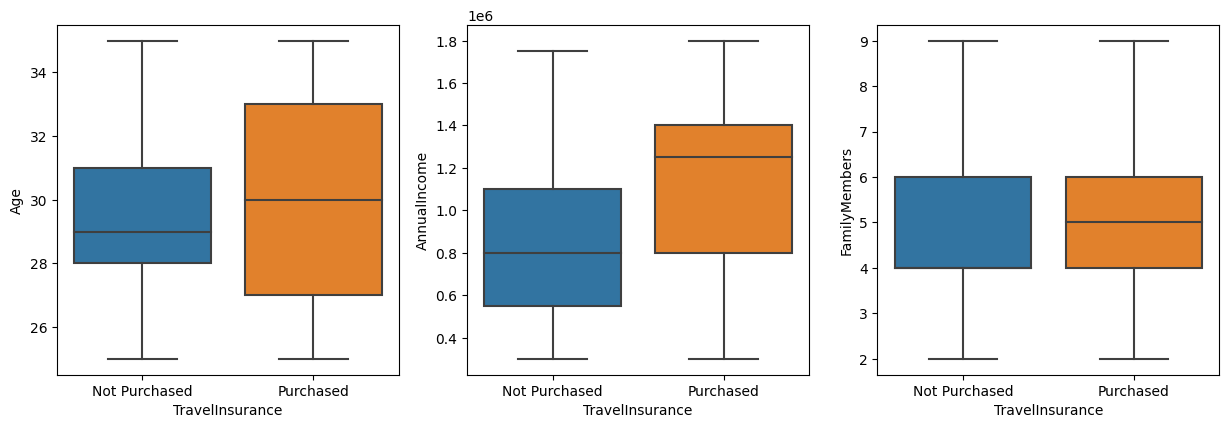

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
num_list = ['Age', 'AnnualIncome','FamilyMembers']
fig = plt.figure(figsize=(15,10))

for i in range(len(num_list)):
  column = num_list[i]
  sub = fig.add_subplot(2,3,i+1)
  sns.boxplot(x = 'TravelInsurance', y = column, data= data)

**Correlation**

<ipython-input-84-e34546f25458>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



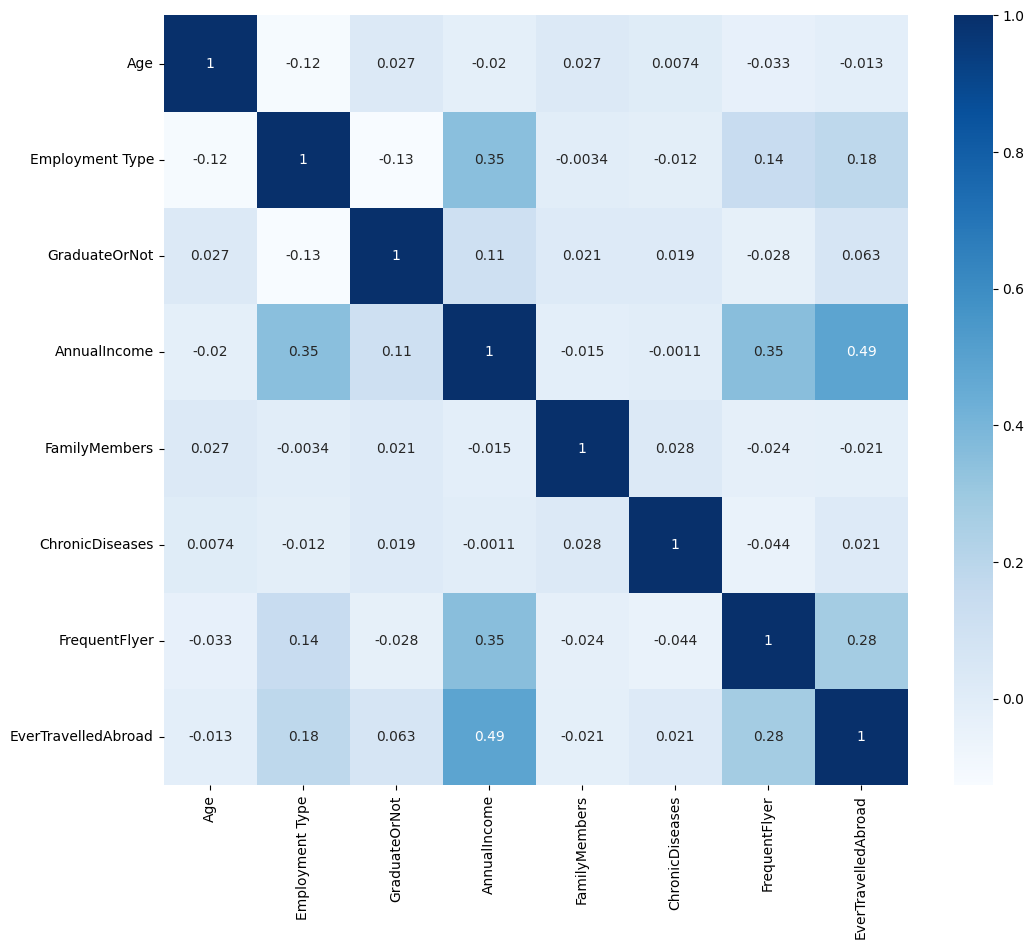

In [84]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

**Divided X and Y as train and test data**

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
x = data[["Age", "GraduateOrNot",
                   "AnnualIncome", "FamilyMembers",
                   "ChronicDiseases", "FrequentFlyer"]]
y = data["TravelInsurance"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [86]:
# x_train[:5]
# x
# y_train

**feature Scaling** is the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly

In [87]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [88]:
# x_train[:5]

**Decision Tree**

In [89]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test)))

0.7682926829268293


[[358  64]
 [ 88 146]]


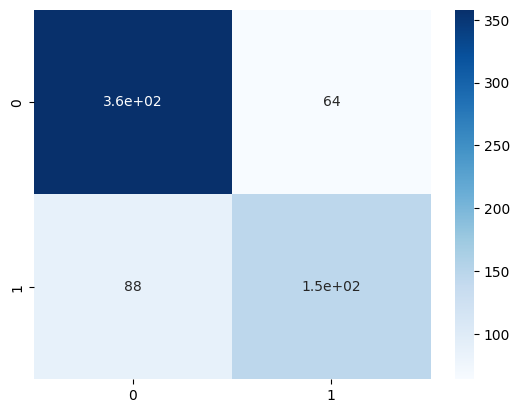

In [91]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot= True, cmap = 'Blues')
print(cm)


**Grid Search for HYPERPARAMETER** https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-*python*

In [92]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('dec_tree', dec_tree)])
n_components = list(range(1,x_train.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                    dec_tree__criterion=criterion,
                    dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

KeyboardInterrupt: ignored

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=8,max_leaf_nodes= 6)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test)))

0.8262195121951219


[[408  14]
 [100 134]]


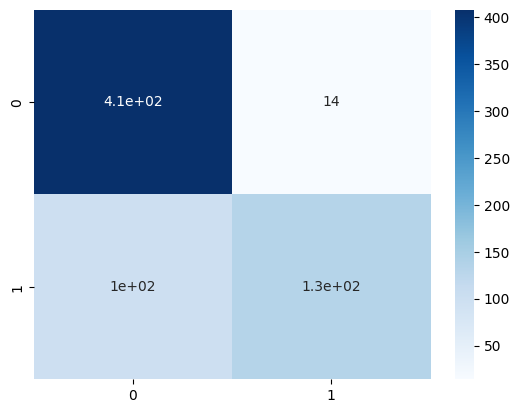

In [26]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot= True, cmap = 'Blues')
print(cm)

**Logistic Regression**

In [27]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=0)
model.fit(x_train, y_train)
#Predicting the test set result
y_pred= model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test)))

0.7286585365853658


[[366  56]
 [122 112]]


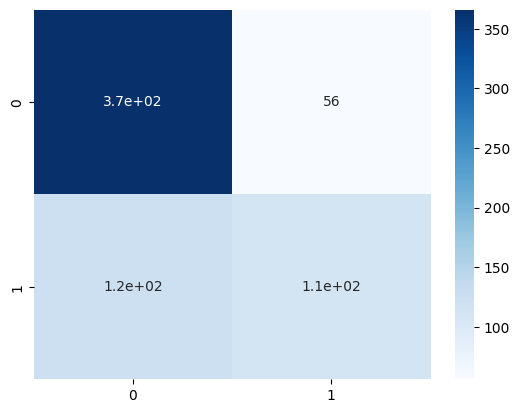

In [29]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot= True, cmap = 'Blues')
print(cm)

**GridSearchCv** https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

In [30]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('std_slc', std_slc),
                    ('pca', pca),
                    ('logistic_Reg', logistic_Reg)])
n_components = list(range(1,x_train.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l2']
parameters = dict(pca__n_components=n_components,
        logistic_Reg__C=C,
        logistic_Reg__penalty=penalty)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print()
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.02811768697974228
Best Number Of Components: 6

LogisticRegression(C=0.02811768697974228)


In [31]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(C=0.02811768697974228)
model.fit(x_train, y_train)
#Predicting the test set result
y_pred= model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test)))

0.7240853658536586


[[370  52]
 [129 105]]


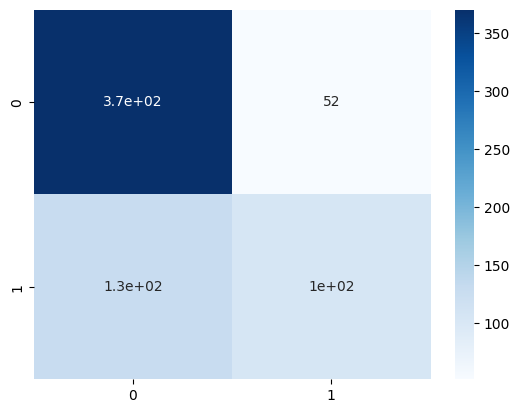

In [33]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot= True, cmap = 'Blues')
print(cm)

**K-Nearest Neighbor(KNN) Algorithm**

In [34]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
model.fit(x_train, y_train)
#Predicting the test set result
y_pred= model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test)))

0.7759146341463414


[[379  43]
 [104 130]]


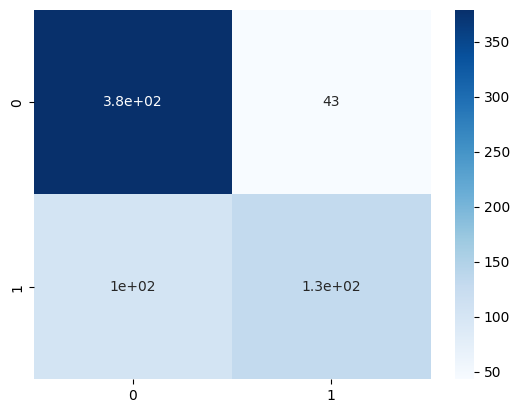

In [36]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot= True, cmap = 'Blues')
print(cm)

In [37]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 21


In [38]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=21, p=1,leaf_size=1)
model.fit(x_train, y_train)
#Predicting the test set result
y_pred= model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(x_test)))

0.7850609756097561


[[395  27]
 [114 120]]


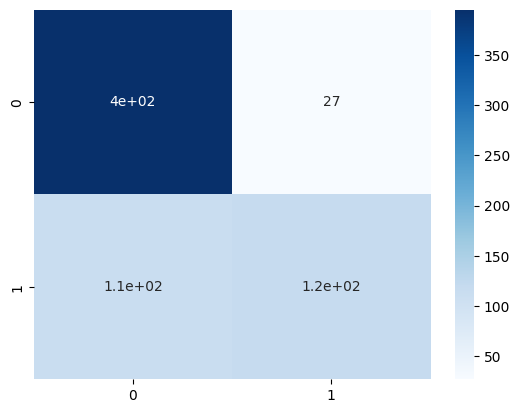

In [40]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot= True, cmap = 'Blues')
print(cm)

**Gradient Boosting algorithm** https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.01)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [43]:
gradient_booster.fit(x_train,y_train)
y_pred = gradient_booster.predict(x_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Not Purchased       0.80      0.97      0.88       422
    Purchased       0.91      0.57      0.70       234

     accuracy                           0.83       656
    macro avg       0.85      0.77      0.79       656
 weighted avg       0.84      0.83      0.81       656



In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, gradient_booster.predict(x_test)))

0.8262195121951219


[[408  14]
 [100 134]]


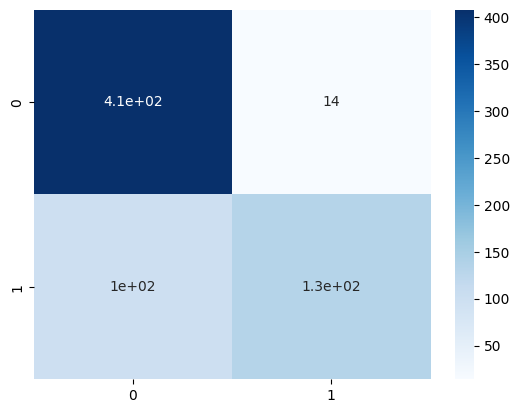

In [45]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm, annot= True, cmap = 'Blues')
print(cm)

**Tuning Gradient boosting** https://educationalresearchtechniques.com/2019/01/14/gradient-boosting-regression-in-python/#:~:text=We%20need%20to%20improve%20on,the%20hyperparameters%20of%20the%20algorithm.&text=Hyperparameter%20tuning%20has%20to%20with,cannot%20learn%20on%20its%20own.

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



In [94]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
y_train = y_train.map({'Purchased':1, 'Not Purchased': 0})
for depth in range (1,10):
  tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
  if tree_regressor.fit(x_train,y_train).tree_.max_depth<depth:
    break
score=np.mean(cross_val_score(tree_regressor,x_train,y_train,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
print(depth, score)

9 -0.17868844006246587


In [95]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [96]:
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.001,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 0.75}

In [97]:
search.best_score_

-0.13854413099716906

In [98]:
GBR2=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.001,subsample=.75,max_depth=4,random_state=1)
score=np.mean(cross_val_score(GBR2,x_train,y_train,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score

-0.1364176463371159